<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 15 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Heart_Rate                47500 non-null  float64
 1   HRV                       47500 non-null  float64
 2   ECG                       47500 non-null  float64
 3   SpO2                      47500 non-null  float64
 4   Respiration_Rate          47500 non-null  float64
 5   Temperature               47500 non-null  float64
 6   Sleep_Duration            47500 non-null  float64
 7   REM_Sleep                 47500 non-null  float64
 8   Activity_Level            47500 non-null  object 
 9   Step_Count                47500 non-null  float64
 10  EDA                       47500 non-null  float64
 11  Blood_Pressure_Systolic   47500 non-null  float64
 12  Blood_Pressure_Diastolic  47500 non-null  float64
 13  Blood_Glucose             47500 non-null  float64
 14  Diseas

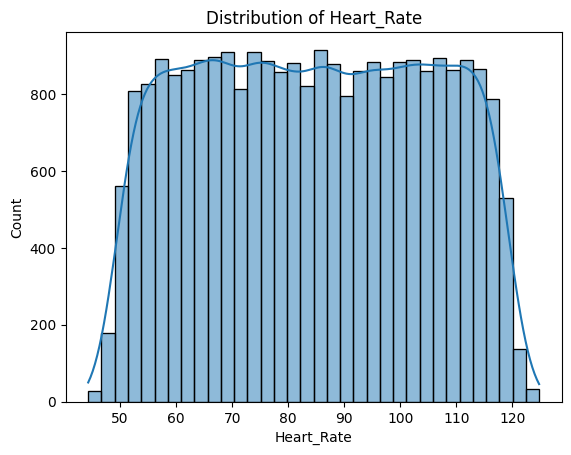

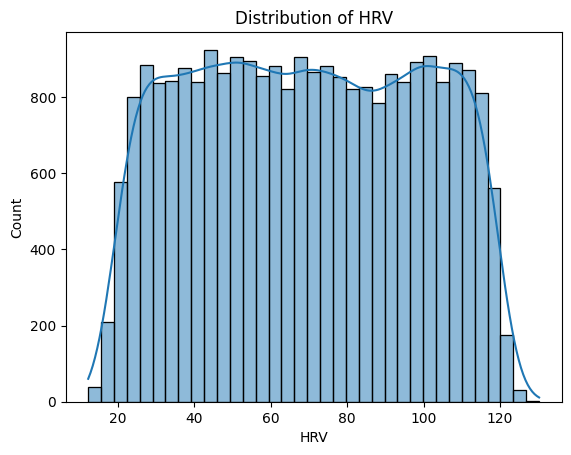

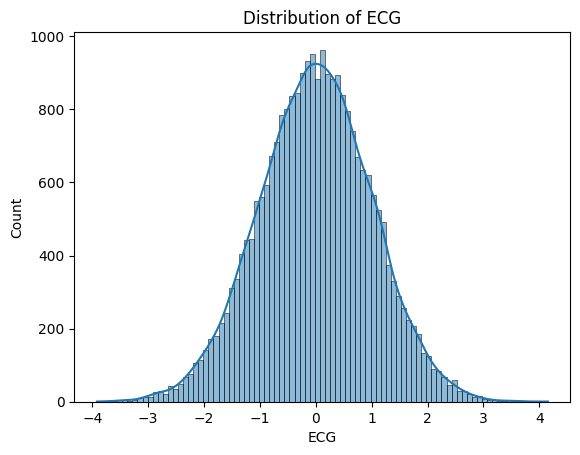

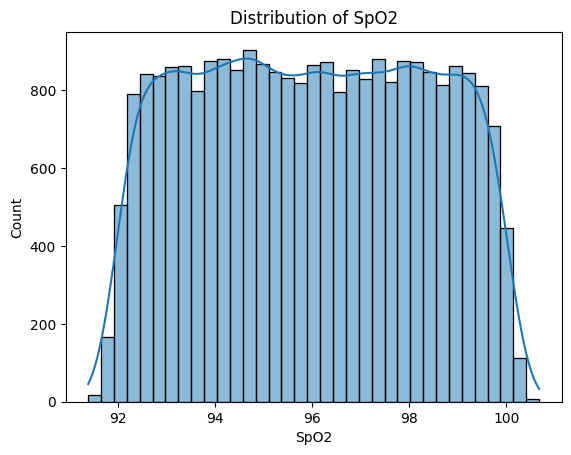

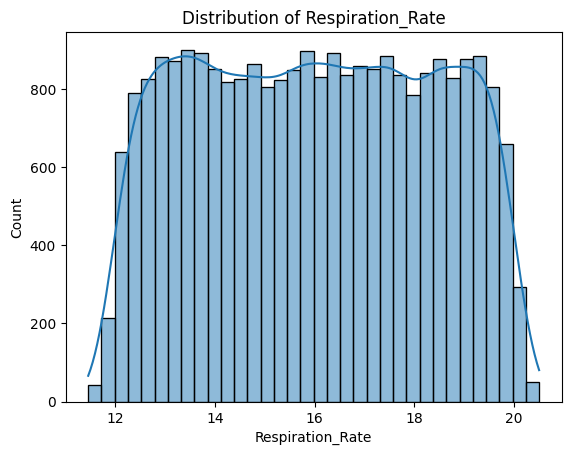

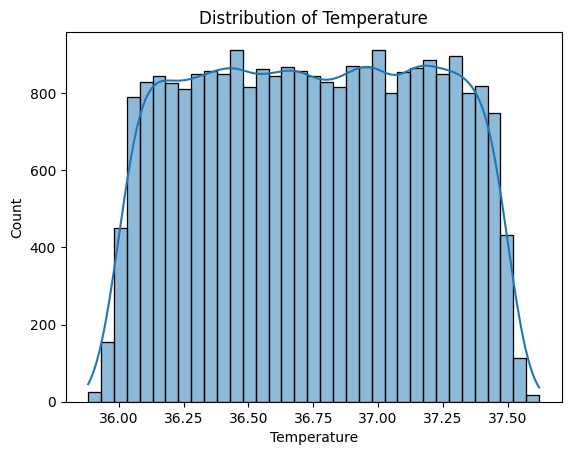

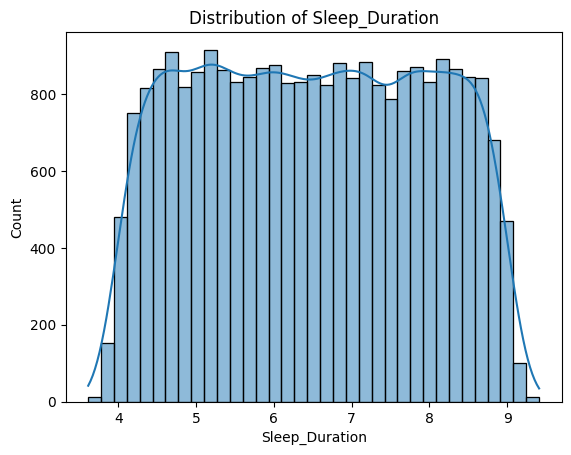

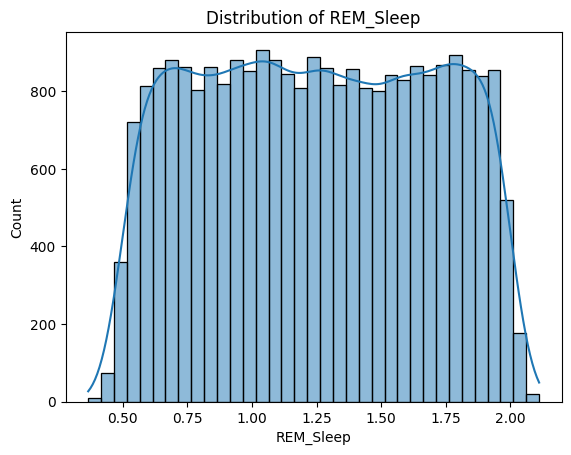

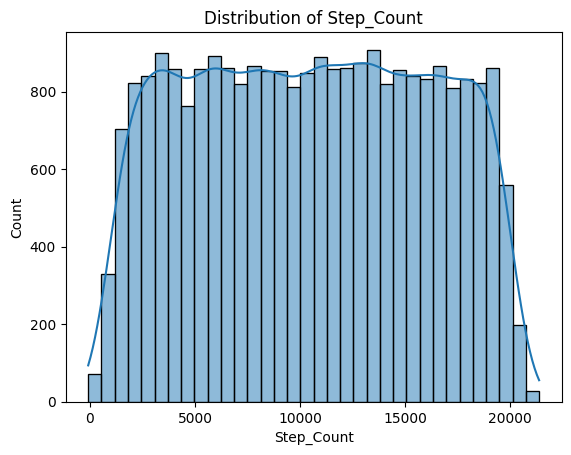

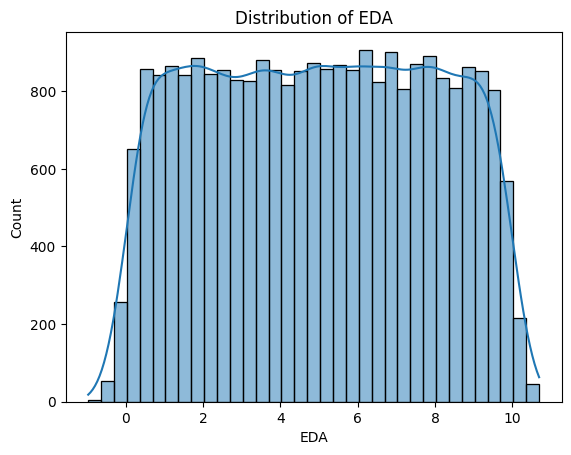

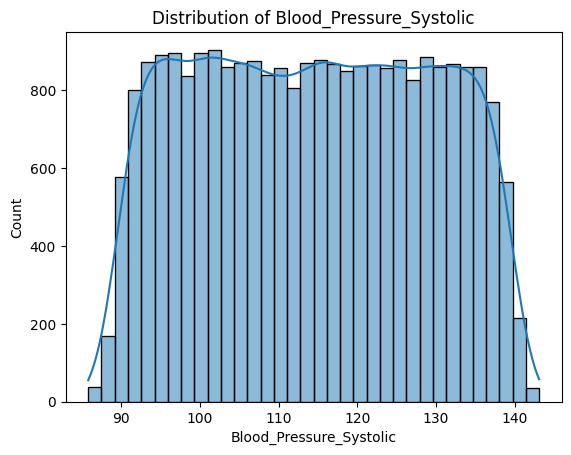

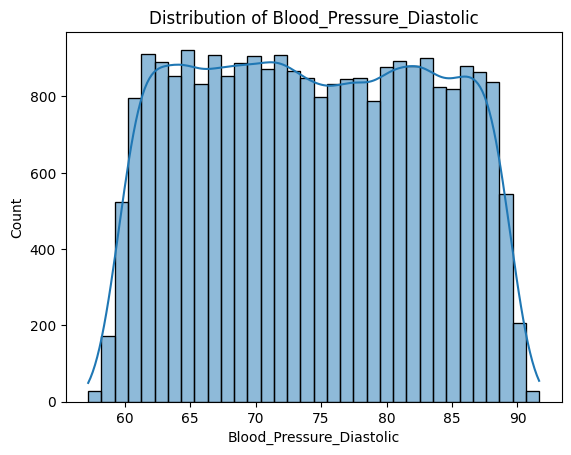

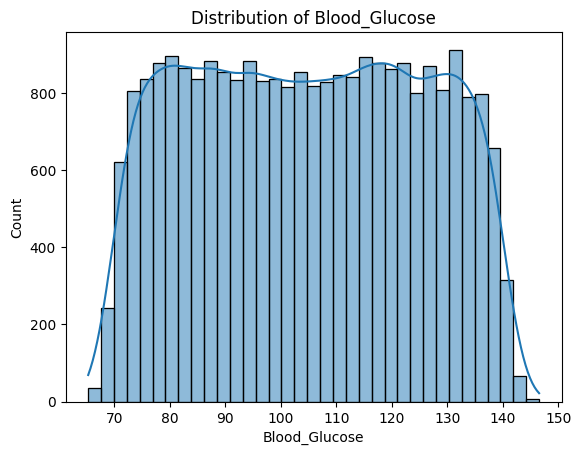

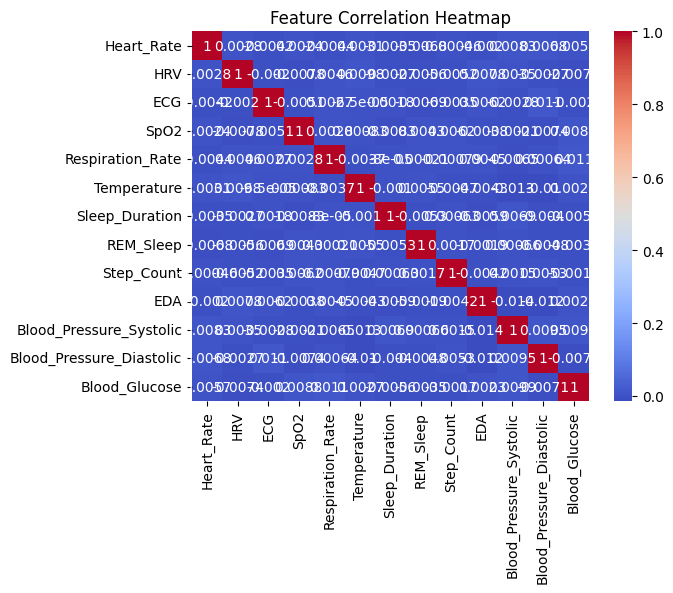

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
data = pd.read_csv('../data/wearable_health_data.csv')

# Basic information
print(data.info())
print(data.describe())

# Print column names to verify
print("Column names:", data.columns)

# Check for missing values
print(data.isnull().sum())

# Visualize distributions of key features
numerical_features = ['Heart_Rate', 'HRV', 'ECG', 'SpO2', 'Respiration_Rate', 'Temperature', 'Sleep_Duration', 'REM_Sleep', 'Step_Count', 'EDA', 'Blood_Pressure_Systolic', 'Blood_Pressure_Diastolic', 'Blood_Glucose']

# Identify and handle non-numeric values
for feature in numerical_features:
    data[feature] = pd.to_numeric(data[feature], errors='coerce')

# Drop rows with non-numeric values
data = data.dropna(subset=numerical_features)

for feature in numerical_features:
    sns.histplot(data[feature].dropna(), kde=True)
    plt.title(f'Distribution of {feature}')
    plt.show()

# Correlation matrix
correlation = data[numerical_features].corr()
sns.heatmap(correlation, annot=True, cmap='coolwarm')
plt.title('Feature Correlation Heatmap')
plt.show()
